# **Goal**
Evaluate A/B testing results from this dataset and decide which marketing strategy works the best and has statistically significant differences among the test groups.

# **Data**
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

# **Metric**
Average revenue on each store location

## **Explore dataset**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ff = pd.read_csv('WA_Marketing-Campaign.csv')
ff.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [ ]:
ff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 30.1+ KB


In [ ]:
ff.describe()

,MarketID,LocationID,AgeOfStore,Promotion,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.029197,2.500000,53.466204
std,2.877001,287.973679,6.638345,0.810729,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,3.000000,4.000000,99.650000


## **Observe number of unique stores in each promotion.**

In [ ]:
ff.groupby('Promotion')['LocationID'].nunique()

Promotion
1    43
2    47
3    47
Name: LocationID, dtype: int64

Promotion 1 has the lowest unique stores among promotions. However, **Number of locations in each promotion seem equal**.

## **Observe revenue each promotion in percent.**

In [ ]:
ff.groupby('Promotion')['SalesInThousands'].sum()/ff['SalesInThousands'].sum()*100

Promotion
1    34.106510
2    30.368901
3    35.524590
Name: SalesInThousands, dtype: float64

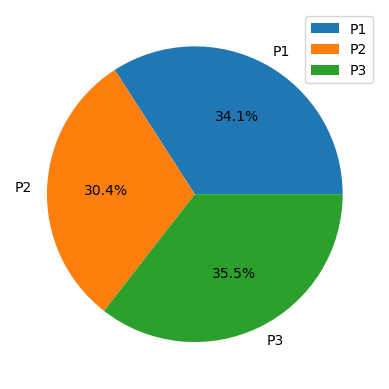

In [ ]:
%matplotlib inline
plt.pie(ff.groupby('Promotion')['SalesInThousands'].sum()/ff['SalesInThousands'].sum()*100,labels = ['P1','P2','P3'],autopct = '%1.1f%%')
plt.legend()

Each promotion group takes roughly **one third** of the total sales during the promotion weeks.

## Observe propotion of marketsize in each promotion.

In [ ]:
ff.groupby(['Promotion', 'MarketSize'])['LocationID'].nunique()/ff.groupby('Promotion')['LocationID'].nunique()*100

Promotion  MarketSize
1          Large         32.558140
           Medium        55.813953
           Small         11.627907
2          Large         34.042553
           Medium        57.446809
           Small          8.510638
3          Large         25.531915
           Medium        61.702128
           Small         12.765957
Name: LocationID, dtype: float64

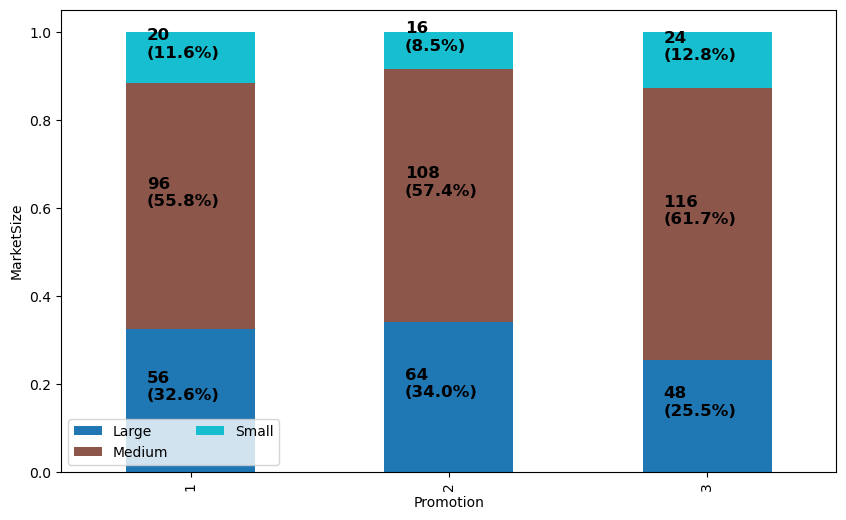

In [ ]:
cross_tab_prop = pd.crosstab(index=ff['Promotion'],
                             columns=ff['MarketSize'],
                             normalize="index")
cross_tab = pd.crosstab(index=ff['Promotion'],
                             columns=ff['MarketSize'])
cross_tab_prop.plot(kind='bar',
                        stacked=True,
                        colormap='tab10',
                        figsize=(10, 6))

plt.legend(loc="lower left", ncol=2)
plt.xlabel("Promotion")
plt.ylabel("MarketSize")


for n, x in enumerate([*cross_tab.index.values]):
    for (proportion, count, y_loc) in zip(cross_tab_prop.loc[x],
                                          cross_tab.loc[x],
                                          cross_tab_prop.loc[x].cumsum()):

        plt.text(x=n - 0.17,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{count}\n({np.round(proportion * 100, 1)}%)',
                 color="black",
                 fontsize=12,
                 fontweight="bold")

plt.show()

Medium Marketsize has the most number of stores in every promotion.

## Explore the AgeOfStore column

<AxesSubplot:xlabel='AgeOfStore'>

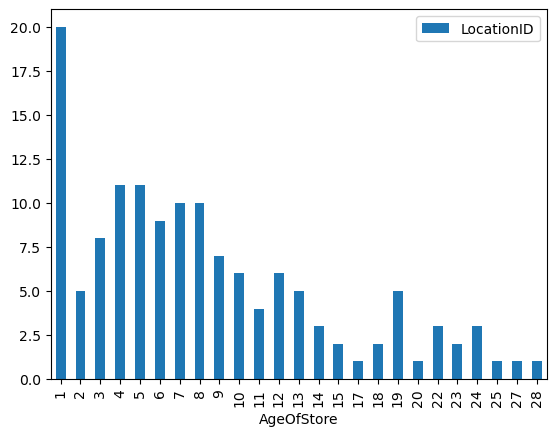

In [ ]:
z = ff.groupby('AgeOfStore')['LocationID'].nunique()
z = pd.DataFrame(z)
z.plot.bar()

In [ ]:
ff.groupby('Promotion')['AgeOfStore'].describe()

,count,mean,std,min,25%,50%,75%,max
Promotion,,,,,,,,
1,172.0,8.279070,6.636160,1.0,3.0,6.0,12.0,27.0
2,188.0,7.978723,6.597648,1.0,3.0,7.0,10.0,28.0
3,188.0,9.234043,6.651646,1.0,5.0,8.0,12.0,24.0


The majority of stores are **10 years old or less**. A large number of stores are **1** year old. \
We see that all three groups seem to have store age profiles. The average ages (Mean) of stores for the three groups are 8-9 years old and the majority of the stores are **10-12 years old or younger**.

### Explore sale in promotion 1.

<AxesSubplot:>

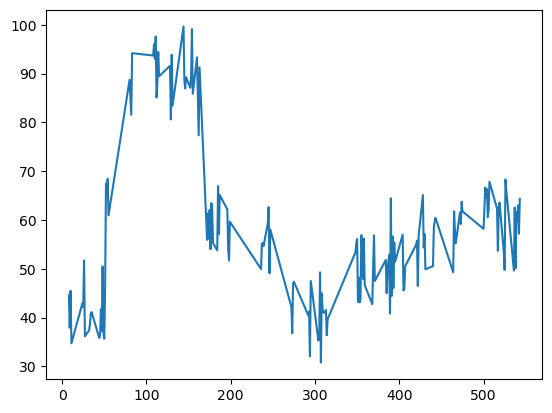

In [ ]:
ff[ff['Promotion'] == 1]['SalesInThousands'].plot()

### Explore sale in promotion 2.

<AxesSubplot:>

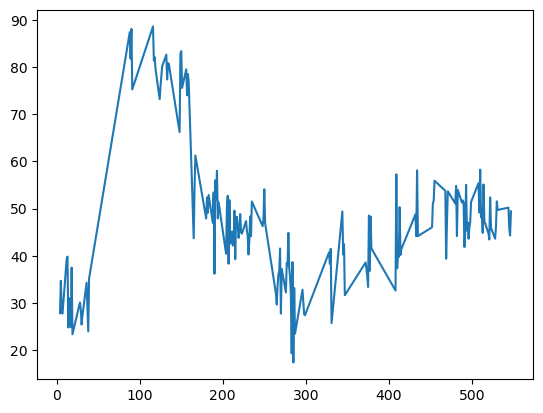

In [ ]:
ff[ff['Promotion'] == 2]['SalesInThousands'].plot()

### Explore sale in promotion 3.

<AxesSubplot:>

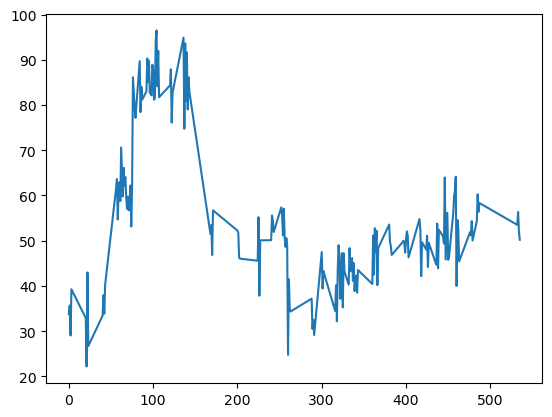

In [ ]:
ff[ff['Promotion'] == 3]['SalesInThousands'].plot()

All three promotions seem to have the **same distribution**. Next, we will conduct hypothesis testing.

## **Hypothesis Testing**
To achieve this goal, we have to check the difference of average revenue of each promotion by using AVOVA.\
Assumption of ANOVA
1. The responses for each factor level have a normal population distribution. **We use QQplot to check normal population(n > 50).**
2. These distributions have the same variance. **We use box plot or Bartlett’s Test.**
3. The data are independent **This dataset is independent because each store has only 1 promotion at that moment of time.**

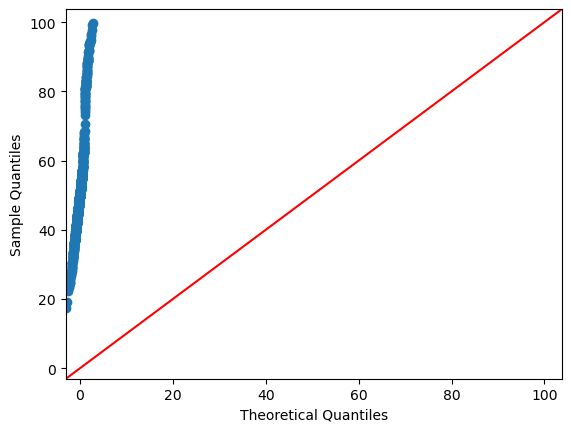

In [ ]:
import statsmodels.api as sm
import pylab as py

sm.qqplot(ff['SalesInThousands'], line ='45')
py.show()

The dataset **does not appear to be normally distributed**. Moreover, we plot by each promotion.

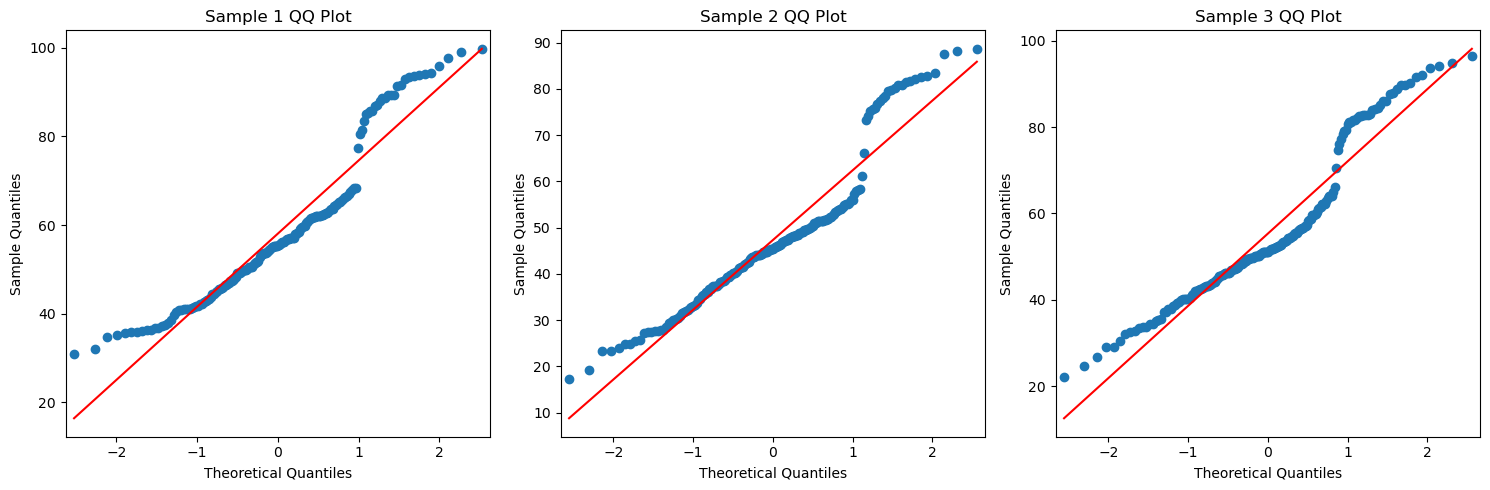

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate example data (replace this with your actual data)
sample1 = ff[ff['Promotion'] == 1]['SalesInThousands']
sample2 = ff[ff['Promotion'] == 2]['SalesInThousands']
sample3 = ff[ff['Promotion'] == 3]['SalesInThousands']

# Create QQ plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sm.qqplot(sample1, line='s', ax=axes[0])
axes[0].set_title('Sample 1 QQ Plot')
sm.qqplot(sample2, line='s', ax=axes[1])
axes[1].set_title('Sample 2 QQ Plot')
sm.qqplot(sample3, line='s', ax=axes[2])
axes[2].set_title('Sample 3 QQ Plot')

plt.tight_layout()
plt.show()

There is evident that our dataset **violate the ANOVA's assumption**. To make sure, we use **Shapiro-Wilk test**. \
**H0** :  the variable is normally distributed. \
**Ha** : the variable is not normally distributed \
at significant level 5%

In [ ]:
from scipy.stats import shapiro
shapiro(ff['SalesInThousands'])

ShapiroResult(statistic=0.9346458911895752, pvalue=9.385896702592596e-15)

Conclusion, this dataset is **not normal distribution**. So we should use non-parametic test **Kruskal-Wallis Test** instead of ANOVA. \
**H0** : the population median of all of the groups are equal. \
**Ha** : the population median of all of the groups are not equal. \
at significant level 5%

In [ ]:
from scipy.stats import kruskal
kw_statistic, kw_p_value = kruskal(sample1, sample2, sample3)
print("Kruskal-Wallis Test:")
print("Statistic:", kw_statistic)
print("p-value:", kw_p_value)

Kruskal-Wallis Test:
Statistic: 53.29475169322799
p-value: 2.6741866266697816e-12


Reject null hypothesis so that **at least one population median of one group is different from the population median of at least one other group**.

We compare each promotion. Start with promotion 1 and 2 by using non parametic test, **1 tailed Mann-Whitney U Test**. \
**H0** : The distribution of values promotion 1 is not significantly greater than the distribution of values in promotion 2..\
**Ha** : The distribution of values in promotion 1 is significantly greater than the distribution of values in promotion 2.

In [ ]:
from scipy.stats import mannwhitneyu
mw_statistic, mw_p_value = mannwhitneyu(sample1, sample2, alternative='greater')
alpha = 0.05

print("One-tailed Mann-Whitney U Test:")
print("Statistic:", mw_statistic)
print("p-value:", mw_p_value)

if mw_p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that promotion 1 tends to have larger values than promotion 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that promotion 1 tends to have larger values than promotion 2.")

One-tailed Mann-Whitney U Test:
Statistic: 22957.5
p-value: 2.922967623419259e-12
Reject the null hypothesis. There is evidence to suggest that promotion 1 tends to have larger values than promotion 2.


Next, we compare promotion 1 and 3 using **1 tailed Mann-Whitney U Test again**. \
**H0** : The distribution of values promotion 1 is not significantly greater than the distribution of values in promotion 3..\
**Ha** : The distribution of values in promotion 1 is significantly greater than the distribution of values in promotion 3.

In [ ]:
mw_statistic, mw_p_value = mannwhitneyu(sample1, sample3, alternative='greater')
alpha = 0.05

print("One-tailed Mann-Whitney U Test:")
print("Statistic:", mw_statistic)
print("p-value:", mw_p_value)

if mw_p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that promotion 1 tends to have larger values than promotion 3.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that promotion 1 tends to have larger values than promotion 3.")

One-tailed Mann-Whitney U Test:
Statistic: 18247.0
p-value: 0.017542047846615602
Reject the null hypothesis. There is evidence to suggest that promotion 1 tends to have larger values than promotion 3.


### To sum up, we decide to choose promotion 1 work the best for marketing strategy

## **The additional study. If we violate normal assumption...**

Due to **the robustness of the t-test**, we can use it instead of a non-parametric test. Since we have a large amount of data with a sample size greater than 30, we can rely on the **Central Limit Theorem** to justify violating the normality assumption for the **t-test**.

We test for **homogeneity of variance**. As a rule of thumb, the proportion of the standard deviation for each promotion must be less than 4.

In [ ]:
rot_1_2 = sample1.std()/sample2.std()
rot_1_3 = sample1.std()/sample3.std()
rot_2_3 = sample2.std()/sample3.std()
print("Propotion of standard deviation between promotion 1 and 2 : {}".format(str(rot_1_2)))
print("Propotion of standard deviation between promotion 1 and 3 : {}".format(str(rot_1_3)))
print("Propotion of standard deviation between promotion 2 and 3 : {}".format(str(rot_2_3)))

Propotion of standard deviation between promotion 1 and 2 : 1.0956271916578562
Propotion of standard deviation between promotion 1 and 3 : 0.9873287515057785
Propotion of standard deviation between promotion 2 and 3 : 0.9011539317601226


We satisfy the assumption of homogeneity of variance.

Now we use **2 sample t test** to analyze marketing strategy.
We compare promotion 1 and 2.\
**Null Hypothesis (H0)** : The population mean of promotion 1 is equal to or less than to the population mean of promotion 2. \
**Alternative Hypothesis (H1)** : The population mean of promotion 1 is greater than the population mean of promotion 2.

In [ ]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(sample1, sample2, alternative='greater')
alpha = 0.05

print("One-Tailed Two-Sample T-Test:")
print("Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the population mean of promotion 1 is greater than the population mean of promotion 2.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the population mean of promotion 1 is greater than the population mean of promotion 2.")

One-Tailed Two-Sample T-Test:
Statistic: 6.453671702181005
p-value: 1.7753348256067283e-10
Reject the null hypothesis. There is evidence to suggest that the population mean of promotion 1 is greater than the population mean of promotion 2.


We compare promotion 1 and 3.\
**Null Hypothesis (H0)** : The population mean of promotion 1 is equal to or less than to the population mean of promotion 3. \
**Alternative Hypothesis (H1)** : The population mean of promotion 1 is greater than the population mean of promotion 3.

In [ ]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(sample1, sample3, alternative='greater')
alpha = 0.05

print("One-Tailed Two-Sample T-Test:")
print("Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the population mean of promotion 1 is greater than the population mean of promotion 3.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the population mean of promotion 1 is greater than the population mean of promotion 3.")

One-Tailed Two-Sample T-Test:
Statistic: 1.5551383687293547
p-value: 0.060398336361566364
Fail to reject the null hypothesis. There is no significant evidence to suggest that the population mean of promotion 1 is greater than the population mean of promotion 3.


In [ ]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(sample1, sample3)
alpha = 0.05

print("One-Tailed Two-Sample T-Test:")
print("Statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is evidence to suggest that the population means of the two samples are not equal.")
else:
    print("Fail to reject the null hypothesis. There is no significant evidence to suggest that the population means of the two samples are not equal.")

One-Tailed Two-Sample T-Test:
Statistic: 1.5551383687293547
p-value: 0.12079667272313273
Fail to reject the null hypothesis. There is no significant evidence to suggest that the population means of the two samples are not equal.


### To sum up, we decide to choose promotion 1 or 3 work the best for marketing strategy